In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

%matplotlib inline

In [4]:
tr=pd.read_csv('train.csv')

In [51]:
tr[:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
tr.shape

(891, 12)

Index([u'PassengerId', u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch',
       u'Fare'],
      dtype='object')


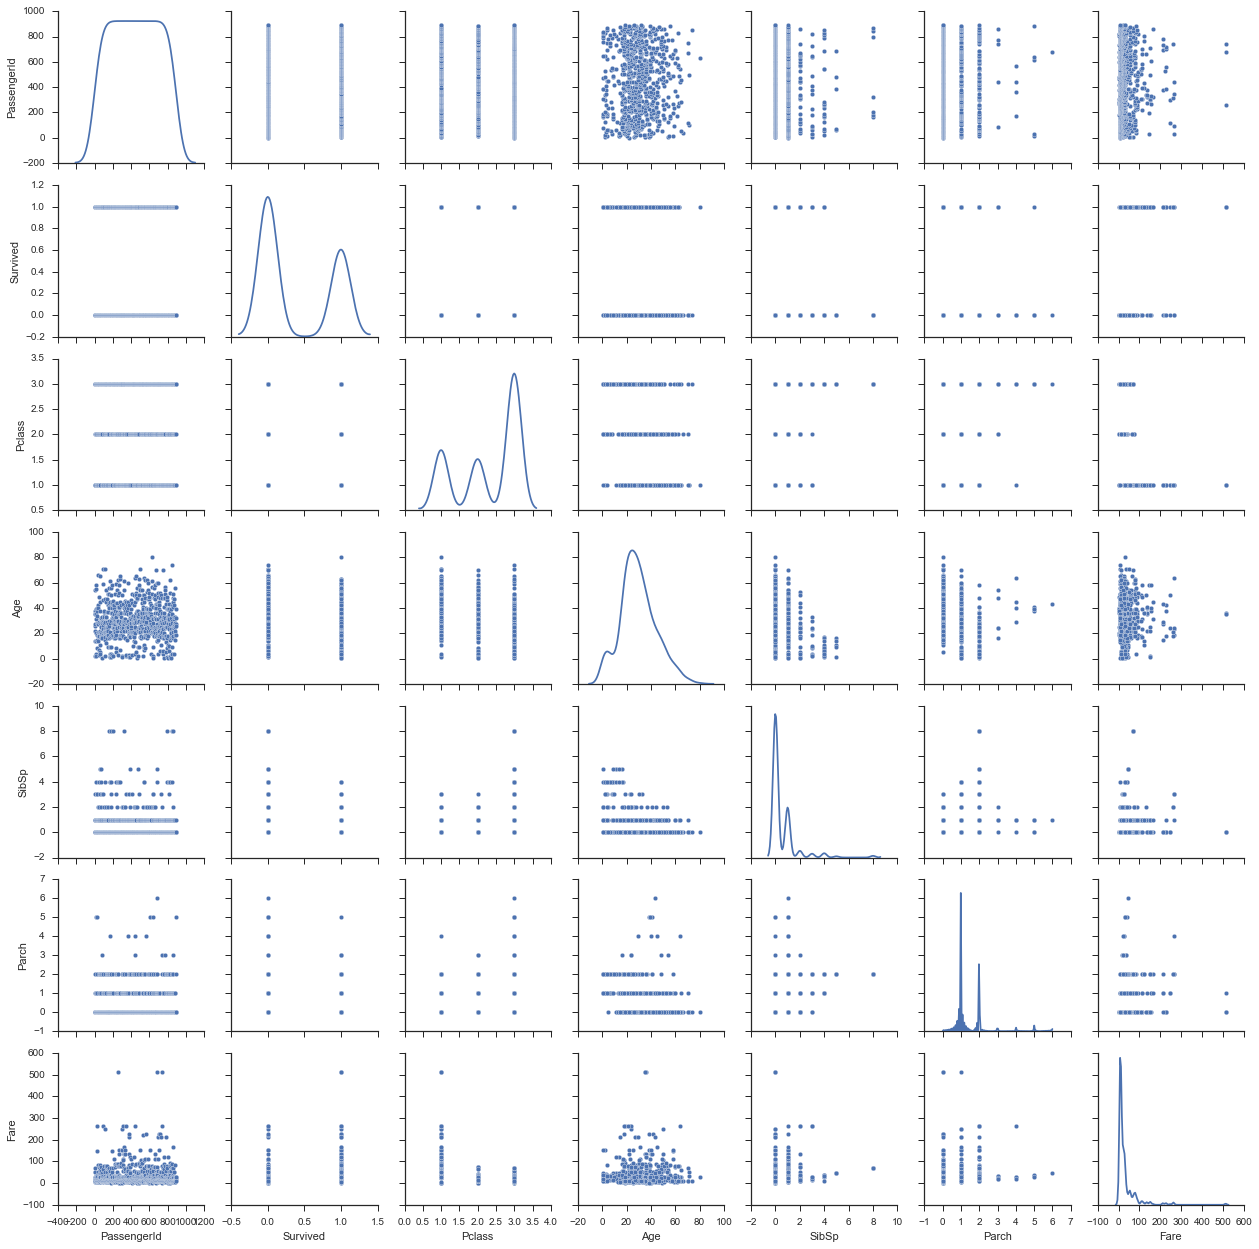

In [21]:
tr_plt = tr[[0,1,2,5,6,7,9]].copy()
print(tr_plt.columns)
# plt.scatter(tr['PassengerId'],tr['Age'])
sns.pairplot(tr_plt,kind='scatter',diag_kind='kde')

In [112]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [113]:
# S = set(tr[[4]]) # collect unique label names
# D = dict( zip(S, range(len(S))) ) # assign each string an integer, and put it in a dict
# Y = [D[y] for y in tr[[4]]] # store class labels as ints
lb_sex = LabelEncoder()
lb_embarked = LabelEncoder()
lbed_sex = lb_gender.fit_transform(tr['Sex'])
lbed_emb = lb_embarked.fit_transform(tr['Embarked'])
tr['Sex_labelled']=lbed_sex
tr['Embarked_labelled']=lbed_emb
# X=tr.iloc[:,2:]#.copy()
X=copy.copy(tr[[2,5,6,7,9,12,13]])
y=copy.copy(tr['Survived'])
print(X.columns)
print(y[:5])

Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_labelled',
       u'Embarked_labelled'],
      dtype='object')
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [114]:
len(X[X.isnull().any(axis=1)])

177

In [132]:
X2=copy.copy(X[[0,2,3,4,5,6]])
print(type(X2))
# print(X2.columns)
X2=pd.DataFrame(X2)
len(X2[X2.isnull().any(axis=1)])

<class 'pandas.core.frame.DataFrame'>


0

In [179]:
svc1 = svm.SVC(kernel='linear', C=1, gamma=0).fit(X2,y) 
y_pred=svc1.predict(X2)
print(r2_score(y, y_pred))

C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


0.0983606557377


((250L, 100L), (250L, 100L))


ValueError: X.shape[1] = 2 should be equal to 6, the number of features at training time

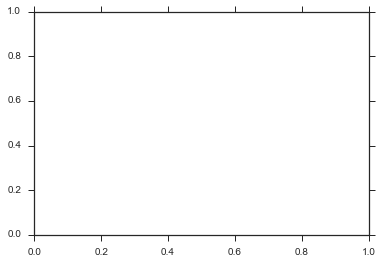

In [186]:
'''Creating a mesh splot with two features'''
x_min, x_max = X2.iloc[:,0].min() - 1, X2.iloc[:,0].max() + 1
y_min, y_max = X2.iloc[:,1].min() - 1, X2.iloc[:,1].max() + 1
h = (x_max - x_min)/100.00#x_max/1000.00#(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
print(xx.shape,yy.shape)
plt.subplot(1, 1, 1)
Z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Predictors')
plt.ylabel('Drowned')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

Adding age

In [140]:
X_y2=copy.copy(tr[[1,2,5,6,7,9,12,13]])
X_y2=X_y2[X_y2.Age.notnull()]
print(X_y2.columns)
print(X_y2.shape)
X3=X_y2.iloc[:,1:]
y3=X_y2[[0]]
print(X3.columns)
print(X3.shape)
print(len(y3))

Index([u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Sex_labelled', u'Embarked_labelled'],
      dtype='object')
(714, 8)
Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_labelled',
       u'Embarked_labelled'],
      dtype='object')
(714, 7)
714


In [141]:
svc1 = svm.SVC(kernel='linear', C=1, gamma=0).fit(X3,y3) 
y_pred=svc1.predict(X3)
print(r2_score(y3, y_pred))

C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


0.0883376707872


In [151]:
svc1 = svm.SVC(kernel='rbf', C=1, gamma=0).fit(X2,y) 
y_pred=svc1.predict(X2)
print(r2_score(y, y_pred))

0.335634167386


C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


In [143]:
svc1 = svm.SVC(kernel='rbf', C=1, gamma=0).fit(X3,y3) 
y_pred=svc1.predict(X3)
print(r2_score(y3, y_pred))

0.605139882889


C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [144]:
svc1 = svm.SVC(kernel='rbf', C=1, gamma=100).fit(X3,y3) 
y_pred=svc1.predict(X3)
print(r2_score(y3, y_pred))

0.918705270007


C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


0.941932335719


C:\Anaconda2\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


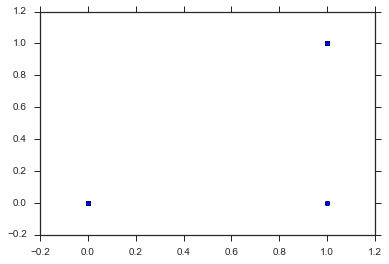

In [163]:
svc1 = svm.SVC(kernel='rbf', C=100, gamma=1000).fit(X3,y3) 
y_pred=svc1.predict(X3)
print(r2_score(y3, y_pred))
plt.scatter(y3,y_pred)

In [164]:
print(y_pred[:10])

[0 1 1 1 0 0 0 1 1 1]


In [154]:
tst=pd.read_csv('test.csv')

In [156]:
len(tst[tst.isnull().any(axis=1)])
print(tst.shape)

(418, 11)


In [157]:
tst[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
xtst=copy.copy(tst[[]])
 score(X, y, sample_weight=None)[source]

- plot svm
- get coeff importance
- feature engineering
- logistic regression for classification